<a href="https://colab.research.google.com/github/MarcosCosta-Py/QuarentenaDados/blob/master/QuarentenaDados_Aula05_(Alura).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**: Antes de começar a aula 5 execute os códigos da aula 04, pois será necessário para essa aula. Feita a execução, vá até o índice **Aula 5.**


Chegou a hora de criar o primeiro modelo de **Machine Learning** em nosso curso.



## **Aula 4: Estatísticas no enem 2018.**

Aqui iremos explorar e conhecer uma pequena amostra da base de dados do **ENEM 2018**. Esse será o primeiro passo para construir os **modelos de machine learning da aula 05**. Se você quiser estudar o código utilizado para criar o dataset desta aula, pode acessar este [**link aqui**](https://github.com/guilhermesilveira/enem-2018).

Vamos iniciar determinando a precisão de casas decimais que o pandas irá exibir os dados (`pd.options.display.float_format`), depois lendo e conhecendo as informações contidas na base de dados.



In [0]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


Conheça todas as colunas do nosso dataframe:

In [0]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

Na videoaula tivemos uma discussão muito bacana sobre uma visão geral dos dados e sua organização, e sobre ética na IA. Se você não assistiu eu recomendo que veja, não cabe aqui no notebook reproduzir a conversa, então vamos seguir com o  desenvolvimento.


Conhecidas as informações, vamos chamar o **describe()** para analisá-las. Se atente ao detalhe que o **describe** só gera informação de dados numéricos!

In [0]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

A saída do `describe` traz várias estatísticas, de forma que algumas não fazem sentido ou não nos interessam neste momento.  Entretanto, se você analisou as últimas colunas, viu que lá temos alguns dados relevantes: notas das provas e redação. 

Desafio você a entrar nos detalhes das análises de notas e diversos outros campos! Como nosso tempo aqui é restrito, vamos analisar apenas as notas entre si, mas reflita: Será que existe uma correlação entre as notas? Quem tira notas maiores em redação também vai bem em linguagens?

Vamos analisar!

In [0]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [0]:
len(dados_notas)

97270

Como queremos analisar as notas detalhadamente, no código acima separamos apenas os dados de interesse. Também removemos todos os valores vazios com o `.dropna()` e trocamos os nomes das colunas para ficar mais legível. 

Por fim, agora nosso DF tem 97270 linhas e 5 colunas.

Agora sim, vamos calcular a correlação usando o `.corr()`:

In [0]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Temos vários resultados interessantes por aqui: o primeiro é uma correlação considerável entre **linguagem_codigo e ciencias_humanas**, o que parece fazer sentido. Uma correlação que surpreende é entre **linguagem_codigo e redacao**. Embora haja uma correlação maior em relação às outras matérias e redação, eu esperava um valor ainda maior do que o existente. 

**Mais alguma correlação te chama a atenção? **

Eu tenho mais uma análise das correlações em geral! Repare que as correlações com linguagem_codigos sempre são as maiores e isso me faz pensar em várias hipóteses!

Será que se eu estudar mais português vou ter um desempenho melhor nas outras matérias? (lembre-se que o ENEM é uma prova que demanda interpretação de texto, então essa prerrogativa pode fazer sentido).
Será que se eu considerar provas de anos anteriores e comparar as correlações com linguagem_códigos elas serão maiores?

A verdade é que uma simples análise de correlação nos gera diversas hipóteses. **Se tiver curiosidade e quiser fazer essas análises fica como um desafio extra!**

Na videoaula você viu que tentamos plotar diversos gráficos para visualizar a correlação de uma melhor forma. Abaixo seguem os códigos usados:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


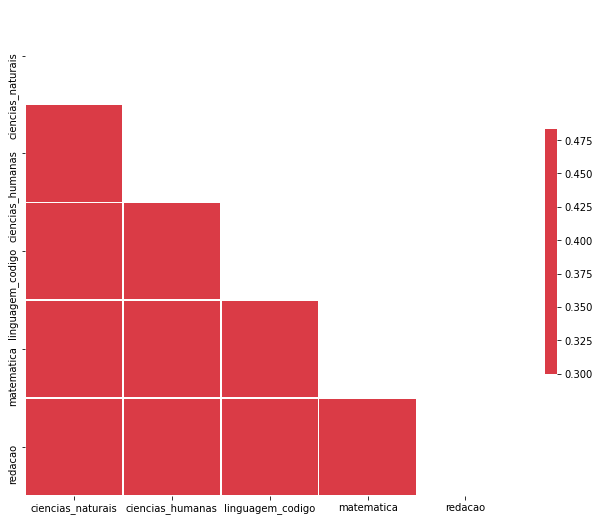

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

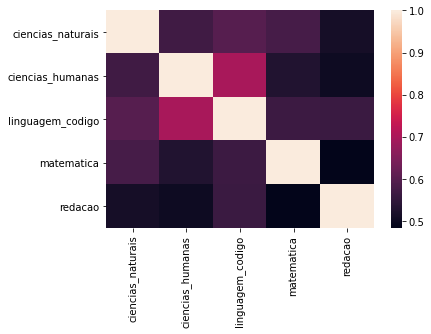

In [0]:
sns.heatmap(corr)

Ok, nós analisamos e conhecemos a base de dados, mas no final o que vou querer é construir um modelo de ML para fazer as predições de algumas notas. Para criar esse modelo de machine learning devemos analisar a distribuição dos nossos dados e verificar se existe alguma tendência entre eles, facilitando o processo preditivo. 

Então, vamos ao **pairplot**:

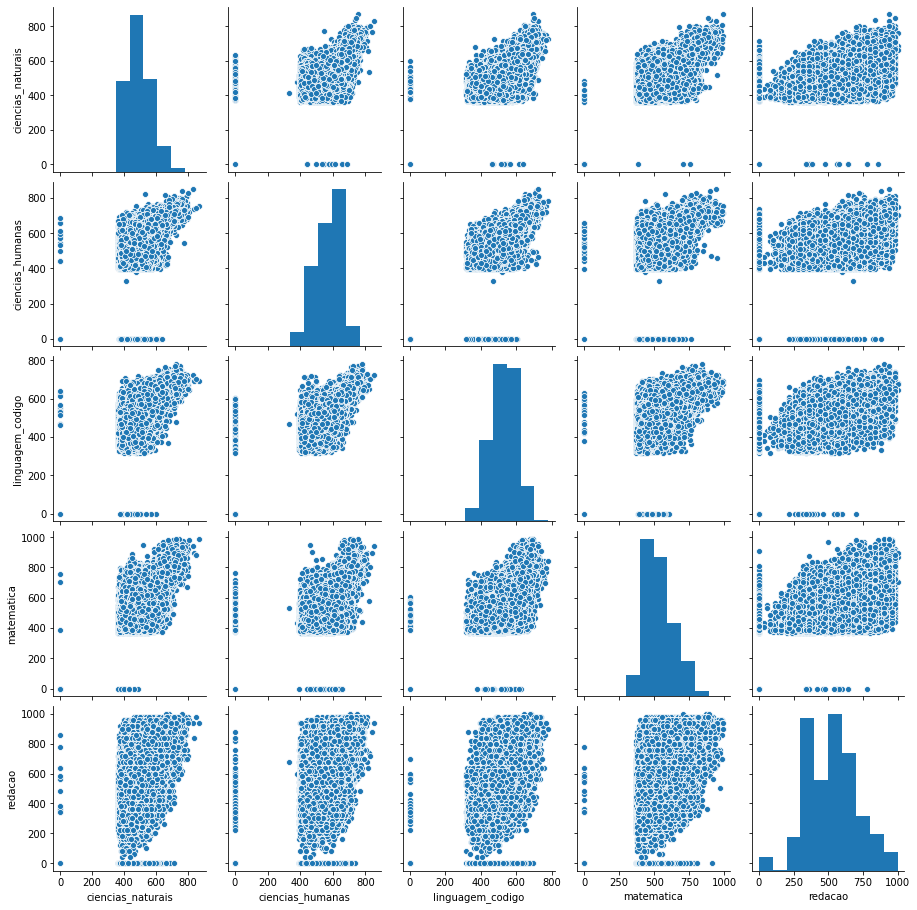

In [0]:
sns.pairplot(dados_notas)

Embora existam alguns dados com maior dispersão, outros parecem obedecer uma certa tendência. Dessa forma, desenvolver um modelo de ML com resultados razoáveis será complexo, porém possível.

Agora iremos entrar em uma área totalmente nova: o desenvolvimento de modelos de machine learning!


## **Aula 5: Modelo de Regressão e Machine Learning.**

Nessa aula discutiremos o que é o processo de classificação e como as máquinas podem aprender esse processo. Após essa discussão iniciaremos o tratamento dos dados para criar nosso primeiro modelo de ML.

A primeira coisa que devemos fazer é separar os dados que vamos usar como entrada do nosso modelo, dos que precisamos prever:

In [0]:
# Separando as notas das provas que iremos usar para tentar prever as notas da prova de linguagem e códigos e apresentando as 5 primeiras linhas.
x_4_notas = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x_4_notas.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


Vamos usar as notas das provas de ciências naturais, ciências humanas, matemática e redação para prever as notas da prova de linguagem e códigos. 

Como separamos os dados de entrada, também devemos fazer o mesmo com aqueles que precisamos adivinhar.

In [0]:
# Selecionando a coluna (com os dados reais) que iremos prever.
y_adivinhar = dados_notas['linguagem_codigo']
y_adivinhar

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

Agora temos os dados que precisamos classificar, mas repare que essa é toda nossa informação! Se eu treinar um modelo com todos esses dados, como eu vou conseguir medir a qualidade do modelo? 

Por isso precisamos dividir nossos dados em dois grupos, um para treino e outro para teste.

Para fazer isso vamos usar métodos da biblioteca Scikit-learn, ela é uma das principais ferramentas no mundo do Machine Learning! Vale conferir e estudar um pouco mais sobre ela, aqui está o [link para a documentação](https://scikit-learn.org/stable/).

Além do Sklearn, iremos utilizar o numpy para setar o seed dos números pseudo-aleatórios.

In [0]:
# importando as bibliotecas necessárias para construção do modelo.
from sklearn.model_selection import train_test_split
import numpy as np
# Setando o seed com 0 valor 43267 para gerar os dados iguais em qualquer ocasião.
np.random.seed(43267)

# f(x) = y
# Dividindo o DataFrame em treino e teste.
x_treino, x_teste, y_treino, y_teste = train_test_split(x_4_notas, y_adivinhar, random_state = 326784)
# Visualizando a tamanhos dos DF divididos.
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [0]:
# Vendo as 5 primeiras linhas do DataFrame x_treino.
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
25012,610.20,651.90,741.40,660.00
52044,571.70,639.60,639.10,680.00
86543,385.90,569.10,502.00,360.00
36362,424.70,446.20,589.80,420.00
96734,831.40,850.40,943.20,940.00


Feita a divisão dos nossos dados, chegou a hora de criar seu primeiro modelo de Regressão.

Vamos utilizar o LinearSVR do scikit-learn:

In [0]:
# Importando o modelo de regressão
from sklearn.svm import LinearSVR

# Instanciando o modelo
modelo = LinearSVR()
# Treinando o modelo
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Até o momento nós treinamos o modelo apenas com o `.fit()`, mas falta fazer a predição dos resultados. Para realizar a predição chamamos o método `.predict()` do **modelo**.

In [0]:
# Fazendo a predição do modelo.
predicoes_notas_linguagem = modelo.predict(x_teste)
# Verificando as 5 primeiras predições do modelo.
predicoes_notas_linguagem[:5]

array([591.30581763, 606.46025242, 639.89298788, 555.97651583,
       472.52000416])

Compare a saída da predição com os valores reais logo abaixo, parece que está fazendo sentido, certo?!

In [0]:
# 5 primeiros valores reais das notas.
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

In [0]:
# Verificando os valores reais das notas com o df y_teste.
y_teste.values

array([577.2, 624.4, 703. , ..., 397.4, 521.6, 619.9])

Nos próximos trechos de códigos vamos plotar alguns gráficos!

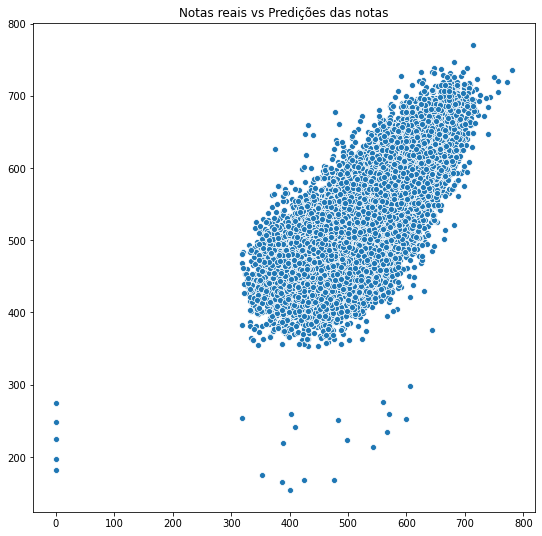

In [0]:
# importando o matplotlib para trabalharmos com os gráficos.
import matplotlib.pyplot as plt
# Plotando um gráfico de dispersão dos Valores reais das notas vs as predições.
plt.figure(figsize=(9,9))
plt.title('Notas reais vs Predições das notas')
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

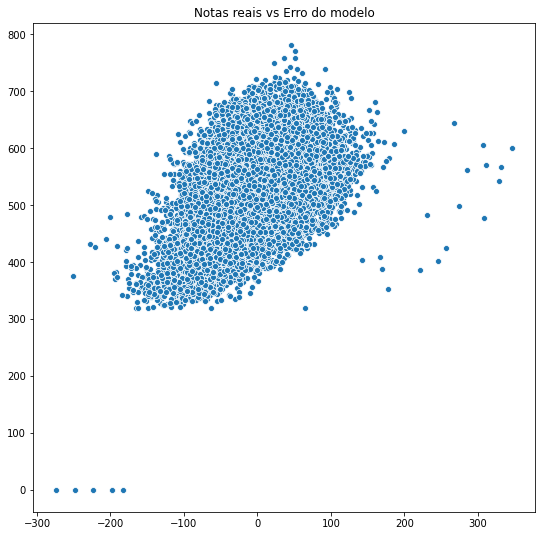

In [0]:
# Plotando um gráfico de dispersão para o erro do modelo
plt.figure(figsize=(9,9))
plt.title('Notas reais vs Erro do modelo')
sns.scatterplot(y=y_teste.values, x=y_teste.values - predicoes_notas_linguagem)

Como podemos observar o zero esta praticamente no meio do eixo y, e pegando ele junto com o valor 500 do eixo x, temos que diversas pessoas tiraram realmente a nota 500 e o modelo previu uma porcentagem relativamente bastante distribuida entre notas abaixo e acima desse valor, o que seria o erro em função da nota das pessoas.

Algumas das possiveis causas dos erros do modelo: a presença dos zeros, o algoritmo não ideal, ou parâmetros não ideais.

In [0]:
# Erro do algoritmo
y_teste -  x_teste.mean(axis=1)

67300    -29.90
113766    -6.23
48328     47.08
9454      53.15
9515     -32.90
          ...  
32842     30.62
42388    -55.85
55278     -9.78
41511    113.38
62897     27.62
Length: 24318, dtype: float64

In [0]:
# Calcula a média pelas linhas
x_teste.mean(axis=1)

67300    607.10
113766   630.62
48328    655.92
9454     545.45
9515     491.50
          ...  
32842    458.08
42388    604.05
55278    407.18
41511    408.23
62897    592.27
Length: 24318, dtype: float64

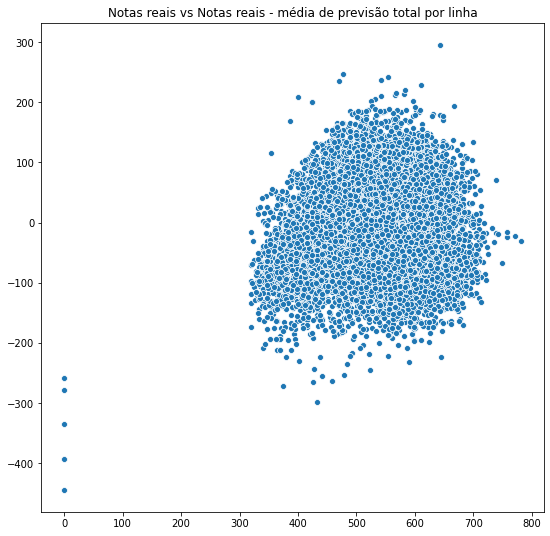

In [0]:
# Predição do Guilherme Silveira. Dummy!
# Plotando um gráfico de dispersão de Notas reais vs Notas reais - média de previsão total por linha
plt.figure(figsize=(9,9))
plt.title('Notas reais vs Notas reais - média de previsão total por linha')
sns.scatterplot(x=y_teste.values, y=y_teste - x_teste.mean(axis=1))


In [0]:
# Verificando a média das notas do conunto de treino.
y_treino.mean()

528.69

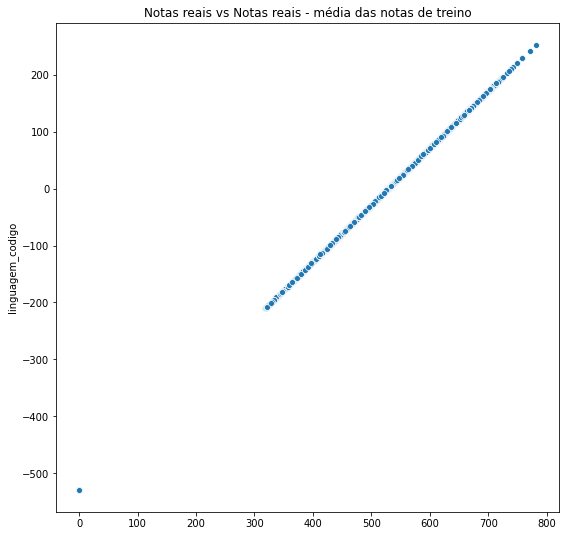

In [0]:
# Predição do Paulo. Dummy!
plt.figure(figsize=(9,9))
plt.title('Notas reais vs Notas reais - média das notas de treino')
sns.scatterplot(x=y_teste.values, y=y_teste - y_treino.mean())

In [0]:
y_treino

25012    608.10
52044    622.00
86543    476.40
36362    531.60
96734    725.90
          ...  
136051   402.90
15740    618.40
70141    524.60
132741   608.70
76871    586.20
Name: linguagem_codigo, Length: 72952, dtype: float64

Após discutir esses gráficos, vamos criar mais um modelo de **machine learning** basededo em "árvores":

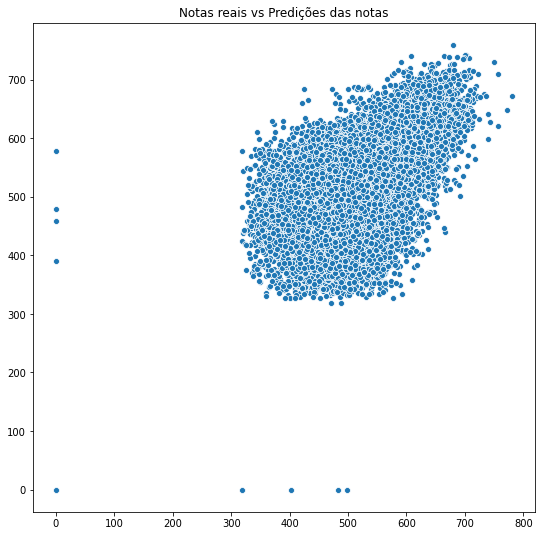

In [0]:
# Importando o modelo
from sklearn.tree import DecisionTreeRegressor
# Criando uma instância para o modelo
modelo = DecisionTreeRegressor()
# Treinando o modelo
modelo.fit(x_treino, y_treino)
# Fazendo as predições do modelo.
predicoes_notas_linguagem = modelo.predict(x_teste)
# Plotando um gráfico de dispersão das Notas reais vs Predições das notas.
plt.figure(figsize=(9,9))
plt.title('Notas reais vs Predições das notas')
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

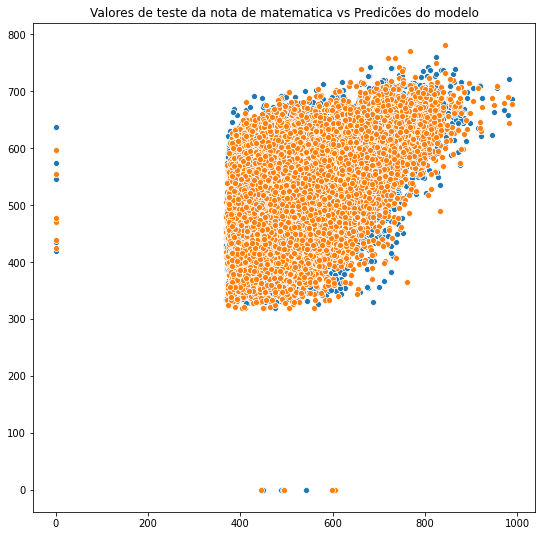

In [0]:
# Plotando um gráfico de dispersão para os valores de teste da nota de matematica vs predicões do modelo e
# um gráfico de dispersão para os valores de teste da nota de matematica vs notas reais.
plt.figure(figsize=(9,9))
plt.title('Valores de teste da nota de matematica vs Predicões do modelo')
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)

Após treinar o modelo e fazer as predições, plotamos duas imagens. A primeira é muito parecida com as os gráficos do primeiro classificador, mas a segunda mostra os valores reais e valores previstos!

Essa figura é muito interessante e mostra uma sobreposição muito boa entre elas, indicando que nossos resultados fazem sentido.

Avaliar os modelos por imagens é uma forma relevante, mas não resume a informação muito bem, por isso ficaria complexo avaliar dois ou três modelos apenas com gráficos.

O que precisamos agora é de uma métrica capaz de nos dizer como nosso modelo está indo, aqui vamos usar o [erro quadrático médio](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio). Existem centenas de métricas de avaliação, tudo vai depender do que você precisa e o que você está prevendo. 

In [0]:
# Importando a métrica do erro quadrático médio.
from sklearn.metrics import mean_squared_error
# Verificando o erro quadrático médio.
mean_squared_error(y_teste, predicoes_notas_linguagem)

4160.60

Veja que nosso erro quadrático médio deu em torno dos 4186.22. Embora pelo gráfico nosso modelo pareça muito bom, pela métrica parece ser um pouco alto.

O MSE, sigla em inglês para essá métrica, é uma medida que quanto mais perto de zero melhor. Veja o resultado quando calculamos o MSE de dois vetores iguais:

In [0]:
# Apresentando a precisão do erro quadrático médio.
mean_squared_error(y_teste, y_teste)

0.00

Nosso resultado é zero! 
Você deve estar se perguntando: meu modelo não está nem perto de zero, será que ele é tão ruim assim?

Nós ainda não temos como te dar essa resposta, precisamos de um critério comparativo, pois assim conseguimos dizer como nosso modelo está indo. Por exemplo, que tal classificar os nossos dados de uma maneira "bobinha"? Para isso temos os chamados métodos **Dummy**.

In [0]:
# Importando o o método DummyRegressor
from sklearn.dummy import DummyRegressor
# Instanciando o método.
modelo_dummy = DummyRegressor()
# Treinando o modelo.
modelo_dummy.fit(x_treino, y_treino)
# Fazendo a predição do modelo.
dummy_predicoes = modelo_dummy.predict(x_teste)
# Calculando o erro quadrático médio.
mean_squared_error(y_teste, dummy_predicoes)

5137.48

Finalmente conseguimos responder se nosso modelo é tão ruim assim! Na realidade nosso modelo não é um dos melhores, temos muito o que melhorar, mas já somos melhores que uma classificação ingênua. 

Com isso, encerramos nossa última aula.

## Desafio 1 da [Allan Spadini](https://twitter.com/allanspadini)

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

In [0]:
# Importando o modelo de regressão
from sklearn.svm import LinearSVR

# Instanciando o modelo
modelo = LinearSVR()
# Treinando o modelo
modelo.fit(x_treino, y_treino)

# Fazendo a predição do modelo.
predicoes_notas_linguagem = modelo.predict(x_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# Erro quadrático médio com os parâmetros iniciais
mean_squared_error(y_teste, predicoes_notas_linguagem)

12672.18

In [0]:
# Importando o modelo de regressão
from sklearn.svm import LinearSVR

# Instanciando o modelo
modelo = LinearSVR(C=75, max_iter=80)
# Treinando o modelo
modelo.fit(x_treino, y_treino)

# Fazendo a predição do modelo.
predicoes_notas_linguagem = modelo.predict(x_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# Erro quadrático médio com novos parâmetros para C  e max_iter
mean_squared_error(y_teste, predicoes_notas_linguagem)

6059.13

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

No gráfico em que plotamos a média com o valor previsto, plote a média das 4 notas ao invés de uma.

In [0]:
x_teste.mean(axis=1)

67300    607.10
113766   630.62
48328    655.92
9454     545.45
9515     491.50
          ...  
32842    458.08
42388    604.05
55278    407.18
41511    408.23
62897    592.27
Length: 24318, dtype: float64

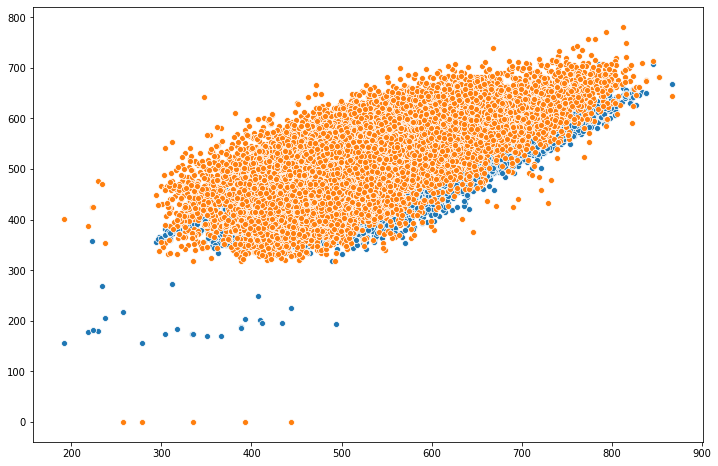

In [0]:
# Plotando um gráfico de dispersão com a média das 4 notas do df x_teste.
plt.figure(figsize=(12,8))
sns.scatterplot(x=x_teste.mean(axis=1).values, y=predicoes_notas_linguagem)
sns.scatterplot(x=x_teste.mean(axis=1).values, y=y_teste.values)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Remover as notas zero e testar os mesmos modelos, comparando o resultado

In [0]:
dados.shape

(137844, 137)

In [0]:
notas_sem_zero = dados_notas.query('ciencias_naturais > 0 &	ciencias_humanas > 0 & linguagem_codigo > 0 &	matematica > 0 & redacao > 0')
notas_sem_zero.shape

(95181, 5)

In [0]:
X_total = notas_sem_zero[['ciencias_naturais','ciencias_humanas','matematica','redacao']]
X_total

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00
...,...,...,...,...
137835,511.50,606.90,513.40,520.00
137836,465.00,546.80,462.80,580.00
137838,576.20,610.40,486.80,820.00
137840,382.40,534.20,576.40,380.00


In [0]:
y_total = notas_sem_zero['linguagem_codigo']
y_total

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 95181, dtype: float64

In [0]:
np.random.seed(43267)
X_train, X_test, y_train, y_test = train_test_split(X_total,y_total,random_state = 326784 )

In [0]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((71385, 4), (23796, 4), (71385,), (23796,))

In [0]:
# Importando o modelo de regressão
from sklearn.svm import LinearSVR

# Instanciando o modelo
modelo = LinearSVR()
# Treinando o modelo
modelo.fit(X_train, y_train)

# Fazendo a predição do modelo.
predicoes_notas_linguagem = modelo.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# Importando a métrica do erro quadrático médio.
from sklearn.metrics import mean_squared_error
# Verificando o erro quadrático médio.
mean_squared_error(y_test, predicoes_notas_linguagem)

3554.10

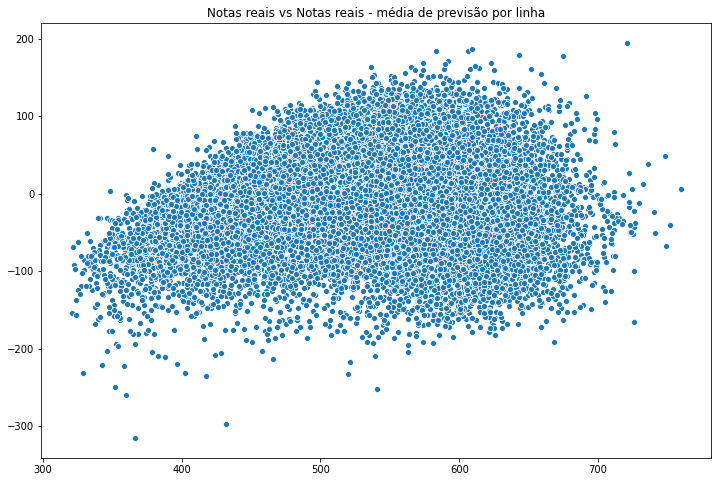

In [0]:
plt.figure(figsize=(12,8))
plt.title('Notas reais vs Notas reais - média de previsão por linha')
sns.scatterplot(x=y_test.values, y=y_test - X_test.mean(axis=1))


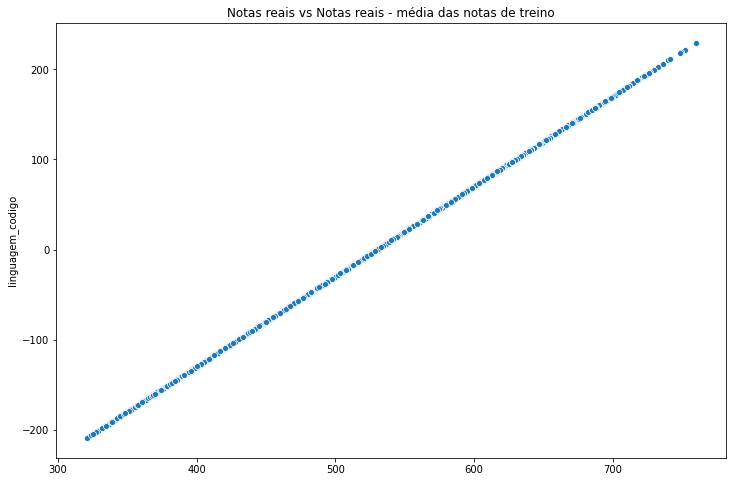

In [0]:
plt.figure(figsize=(12,8))
plt.title('Notas reais vs Notas reais - média das notas de treino')
sns.scatterplot(x=y_test.values, y=y_test - y_train.mean())

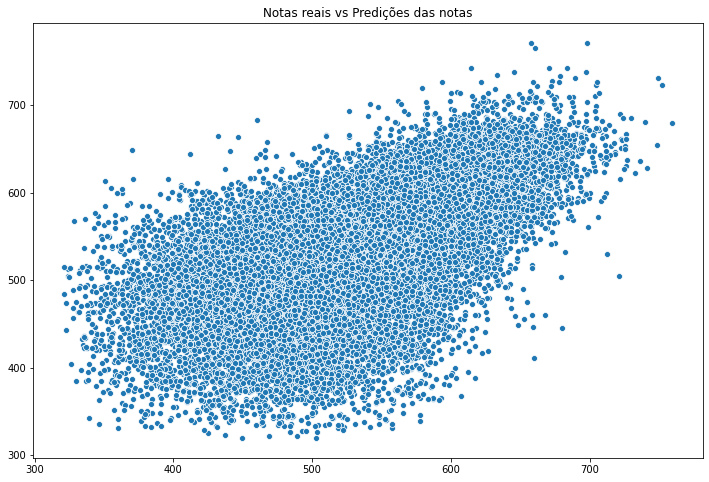

In [0]:
# Importando o modelo
from sklearn.tree import DecisionTreeRegressor
# Criando uma instância para o modelo
modelo = DecisionTreeRegressor()
# Treinando o modelo
modelo.fit(X_train, y_train)
# Fazendo as predições do modelo.
predicoes_notas_linguagem = modelo.predict(X_test)
# Plotando um gráfico de dispersão das Notas reais vs Predições das notas.
plt.figure(figsize=(12,8))
plt.title('Notas reais vs Predições das notas')
sns.scatterplot(x=y_test.values, y=predicoes_notas_linguagem)

In [0]:
# Verificando o erro quadrático médio.
mean_squared_error(y_test, predicoes_notas_linguagem)

4039.14

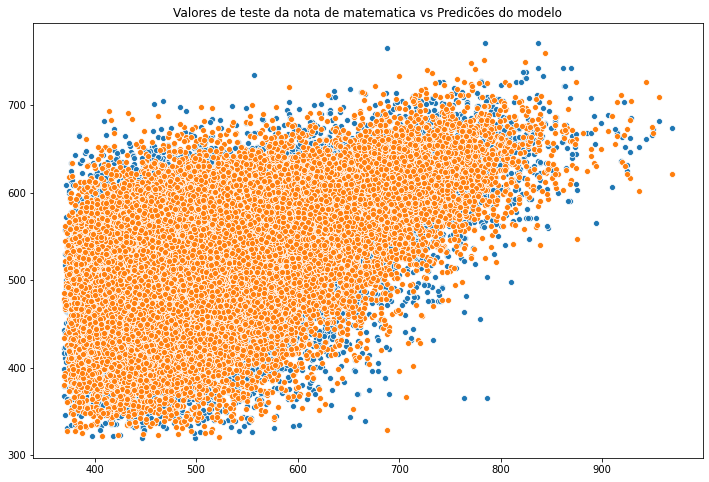

In [0]:
plt.figure(figsize=(12,8))
plt.title('Valores de teste da nota de matematica vs Predicões do modelo')
sns.scatterplot(x=X_test['matematica'].values, y=predicoes_notas_linguagem)
sns.scatterplot(x=X_test['matematica'].values, y=y_test.values)

In [0]:
from sklearn.dummy import DummyRegressor
# Instanciando o método.
modelo_dummy = DummyRegressor()
# Treinando o modelo.
modelo_dummy.fit(X_train, y_train)
# Fazendo a predição do modelo.
dummy_predicoes = modelo_dummy.predict(X_test)
# Calculando o erro quadrático médio.
mean_squared_error(y_test, dummy_predicoes)

5050.37

Fazendo uma análise com base nos erro quadrático médio, é possível perceber que os dados sem as notas zero foram melhores para alguns modelos e pior no LinearSVR.

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Interpretar tudo que foi feito e compartilhar suas conclusões

Com base nas análises dos erros médios e os gráficos plotados, conseguimos quantificar e visualizar o desempenho do modelo. De um modo geral não foi o melhor, porém com base em um método Dummy verificamos que teve um desenvolvimento até razoável.

Com base no modelo DecisionTreeRegressor, após retirar os valores zeros e plotar o gráfico de disperção, vemos que há uma linearidade entre os dados e que o modelo teve um melhor desempenho. Porém o erro média ainda é alto.

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

In [0]:
# Aplicando o modelo no próprio conjunto de treino.
modelo = DecisionTreeRegressor()
modelo.fit(x_treino,y_treino)
predicoes_notas_linguagem = modelo.predict(x_treino)
mean_squared_error(y_treino, predicoes_notas_linguagem)

0.00

Como aplicamos a métrica de erros no conjunto de treino e predizemos para o mesmo conjunto, o erro é 0.